In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data=pd.read_csv("perrin-freres-monthly-champagne-.csv")
data.head()

,Month,Perrin Freres monthly champagne sales millions ?64-?72
0,1964-01,2815.0
1,1964-02,2672.0
2,1964-03,2755.0
3,1964-04,2721.0
4,1964-05,2946.0


In [3]:
data.tail()

,Month,Perrin Freres monthly champagne sales millions ?64-?72
102,1972-07,4298.0
103,1972-08,1413.0
104,1972-09,5877.0
105,NaN,NaN
106,Perrin Freres monthly champagne sales millions...,NaN


In [4]:
data.head()

,Month,Perrin Freres monthly champagne sales millions ?64-?72
0,1964-01,2815.0
1,1964-02,2672.0
2,1964-03,2755.0
3,1964-04,2721.0
4,1964-05,2946.0


In [5]:
data.drop(105,axis=0,inplace=True)
data.drop(106,axis=0,inplace=True)

In [6]:
data.tail()

,Month,Perrin Freres monthly champagne sales millions ?64-?72
100,1972-05,4618.0
101,1972-06,5312.0
102,1972-07,4298.0
103,1972-08,1413.0
104,1972-09,5877.0


As the columns name doesn't look good we are changing the column name to "Sales"

In [7]:
data.columns=["Month","Sales"]
data.head()

,Month,Sales
0,1964-01,2815.0
1,1964-02,2672.0
2,1964-03,2755.0
3,1964-04,2721.0
4,1964-05,2946.0


In [8]:
data.tail()

,Month,Sales
100,1972-05,4618.0
101,1972-06,5312.0
102,1972-07,4298.0
103,1972-08,1413.0
104,1972-09,5877.0


In [9]:
data['Month']=pd.to_datetime(data['Month'])

In [10]:
data.head()

,Month,Sales
0,1964-01-01,2815.0
1,1964-02-01,2672.0
2,1964-03-01,2755.0
3,1964-04-01,2721.0
4,1964-05-01,2946.0


In [11]:
data.set_index('Month',inplace=True)
data.head()

,Sales
Month,
1964-01-01,2815.0
1964-02-01,2672.0
1964-03-01,2755.0
1964-04-01,2721.0
1964-05-01,2946.0


In [12]:
data.describe()

,Sales
count,105.000000
mean,4761.152381
std,2553.502601
min,1413.000000
25%,3113.000000
50%,4217.000000
75%,5221.000000
max,13916.000000


<Axes: xlabel='Month'>

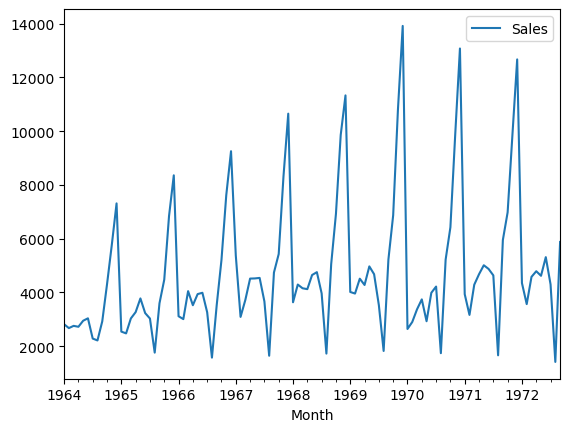

In [13]:
data.plot()

The below piece of code is to perform Augmented dickey-fuller test(adfuller) the following test is a statistical test that is used to find out whether the given time-series data is stationary or not

So here we consider 2 hypothesis that is

$$H_0:\text{Time series data is not stationary (This is null hypothesis)}$$
$$H_1:\text{Time series data is stationary     (This is alternate hypothesis)}$$


In [14]:
from statsmodels.tsa.stattools import adfuller
test_result=adfuller(data['Sales'])
def adfuller_test(sales):
    result=adfuller(sales)
    labels=['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value))
    if result[1]<=0.05:
        print("Time series data is stationary")
    else:
        print("Time series data is not stationary")
         

In [15]:
adfuller_test(data['Sales'])

ADF Test Statistic : -1.8335930563276204
p-value : 0.3639157716602462
#Lags Used : 11
Number of Observations Used : 93
Time series data is not stationary


In [16]:
data['Sales first difference']=data['Sales']-data['Sales'].shift(1)

In [17]:
data.head()

,Sales,Sales first difference
Month,,
1964-01-01,2815.0,NaN
1964-02-01,2672.0,-143.0
1964-03-01,2755.0,83.0
1964-04-01,2721.0,-34.0
1964-05-01,2946.0,225.0


In [18]:
data['Seasonal first difference']=data['Sales']-data['Sales'].shift(12)

In [19]:
data.head(16)

,Sales,Sales first difference,Seasonal first difference
Month,,,
1964-01-01,2815.0,NaN,NaN
1964-02-01,2672.0,-143.0,NaN
1964-03-01,2755.0,83.0,NaN
1964-04-01,2721.0,-34.0,NaN
1964-05-01,2946.0,225.0,NaN
1964-06-01,3036.0,90.0,NaN
1964-07-01,2282.0,-754.0,NaN
1964-08-01,2212.0,-70.0,NaN
1964-09-01,2922.0,710.0,NaN


In [20]:
adfuller_test(data['Seasonal first difference'].dropna())

ADF Test Statistic : -7.626619157213163
p-value : 2.060579696813685e-11
#Lags Used : 0
Number of Observations Used : 92
Time series data is stationary


<Axes: xlabel='Month'>

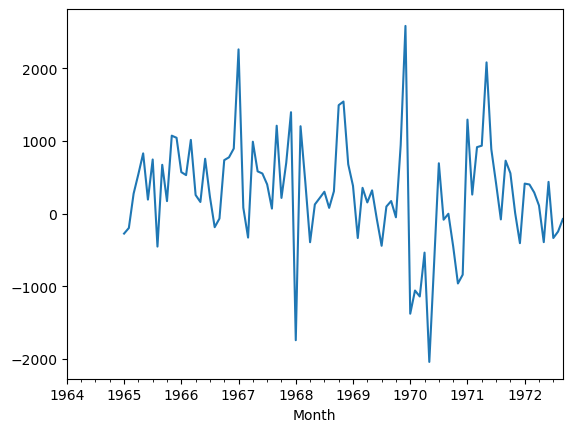

In [21]:
data['Seasonal first difference'].plot()

IF U CONSIDER THE AUTOREGRESSIVE MODEL (AR) EQUATION WE CAN ONLY WE DON'T KNOW UPTO WHICH TIME LAG WE NEED TO CONSIDER THE DATA SO THAT THE FORECASTING WILL BE GOOD.SO IN ORDER TO FIND OUT WE USE THE AUTOCORRELATION PLOT

SO NOW WE WILL BE USING AUTOCORRELATION PLOT AND CORRELATION PLOT

# Below piece of code to find the seasonal order of the data 

In [22]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

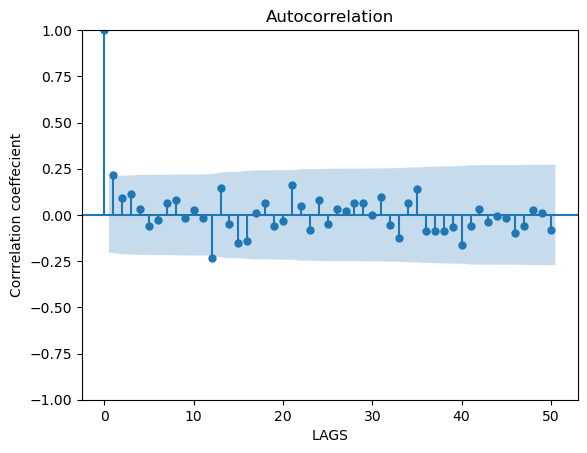

In [24]:
fig1=plot_acf(data['Seasonal first difference'].dropna(),lags=50)
plt.xlabel("LAGS")
plt.ylabel("Corrrelation coeffecient")
plt.show(fig1)

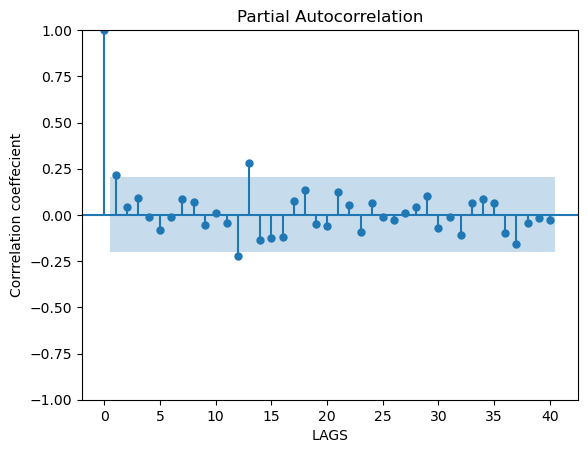

In [43]:
fig2=plot_pacf(data['Seasonal first difference'].dropna(),lags=40)
plt.xlabel("LAGS")
plt.ylabel("Corrrelation coeffecient")
plt.show(fig2)

# Below code we apply to pacf and acf to find non-seasonal order

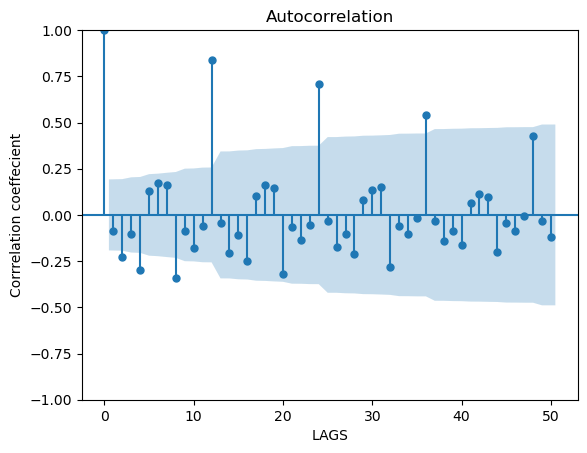

In [44]:
fig1=plot_acf(data['Sales first difference'].dropna(),lags=50)
plt.xlabel("LAGS")
plt.ylabel("Corrrelation coeffecient")
plt.show(fig1)

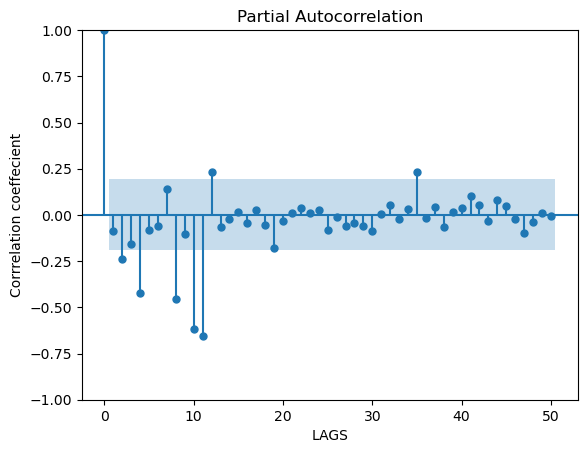

In [45]:
fig1=plot_pacf(data['Sales first difference'].dropna(),lags=50)
plt.xlabel("LAGS")
plt.ylabel("Corrrelation coeffecient")
plt.show(fig1)

In [26]:
from statsmodels.tsa.arima.model import ARIMA

In [48]:
model=ARIMA(data['Sales'],order=(11,1,37))
model_fit=model.fit()

C:\Users\chait\AppData\Roaming\Python\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\chait\AppData\Roaming\Python\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\chait\AppData\Roaming\Python\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\chait\AppData\Roaming\Python\Python311\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
C:\Users\ch

In [49]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Sales   No. Observations:                  105
Model:               ARIMA(11, 1, 37)   Log Likelihood                -914.132
Date:                Tue, 11 Jun 2024   AIC                           1926.264
Time:                        12:09:14   BIC                           2055.839
Sample:                    01-01-1964   HQIC                          1978.759
                         - 09-01-1972                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.7391     27.122     -0.027      0.978     -53.898      52.420
ar.L2         -0.7729      8.190     -0.094      0.925     -16.825      15.279
ar.L3         -0.6926     22.266     -0.031      0.975     -44.334      42.949
ar.L4         -0.9326      3.140     -0.297      0.766      -7.086       5.221
ar.L5         -0.7267     25.927     -0.028      0.978     -51.543      50.090
ar.L6         -0.7312      9.335     -0.078      0.938     -19.028      17.565
ar.L7         -0.6470     21.704     -0.030      0.976     -43.185      41.891
ar.L8         -0.8533      3.010     -0.284      0.777      -6.752       5.045
ar.L9         -0.6767     23.546     -0.029      0.977     -46.826      45.473
ar.L10        -0.6838      7.257     -0.094      0.925     -14.907      13.539
ar.L11        -0.5880     19.365     -0.030      0.976     -38.543      37.367
ma.L1          0.1035     27.020      0.004      0.997     -52.854      53.061
ma.L2          0.0401     18.913      0.002      0.998     -37.028      37.108
ma.L3          0.0892     17.661      0.005      0.996     -34.526      34.704
ma.L4          0.2452     12.210      0.020      0.984     -23.685      24.176
ma.L5         -0.0206     17.768     -0.001      0.999     -34.846      34.805
ma.L6         -0.0265     13.909     -0.002      0.998     -27.288      27.235
ma.L7          0.1077     14.206      0.008      0.994     -27.736      27.952
ma.L8          0.1542      7.956      0.019      0.985     -15.440      15.748
ma.L9         -0.0114     11.431     -0.001      0.999     -22.415      22.392
ma.L10        -0.0225      8.750     -0.003      0.998     -17.173      17.127
ma.L11         0.0690      8.826      0.008      0.994     -17.230      17.368
ma.L12         0.0235      5.446      0.004      0.997     -10.650      10.697
ma.L13         0.0594      6.557      0.009      0.993     -12.791      12.910
ma.L14        -0.0264      3.883     -0.007      0.995      -7.638       7.585
ma.L15         0.0223      4.647      0.005      0.996      -9.086       9.131
ma.L16         0.0879      3.794      0.023      0.982      -7.349       7.525
ma.L17        -0.0228      6.508     -0.004      0.997     -12.779      12.733
ma.L18        -0.0147      5.146     -0.003      0.998     -10.102      10.072
ma.L19         0.0016      6.873      0.000      1.000     -13.470      13.473
ma.L20         0.0285      3.928      0.007      0.994      -7.671       7.728
ma.L21        -0.0022      5.008     -0.000      1.000      -9.818       9.813
ma.L22        -0.0169      3.718     -0.005      0.996      -7.304       7.270
ma.L23        -0.0230      3.995     -0.006      0.995      -7.853       7.807
ma.L24         0.1068      3.265      0.033      0.974      -6.292       6.506
ma.L25         0.0299      5.260      0.006      0.995     -10.279      10.339
ma.L26        -0.0078      3.533     -0.002      0.998      -6.933       6.918
ma.L27        -0.0097      4.231     -0.002      0.998      -8.303       8.283
ma

In [50]:
data['forecast']=model_fit.predict(start=60,end=93,dynamic=True)

<Axes: xlabel='Month'>

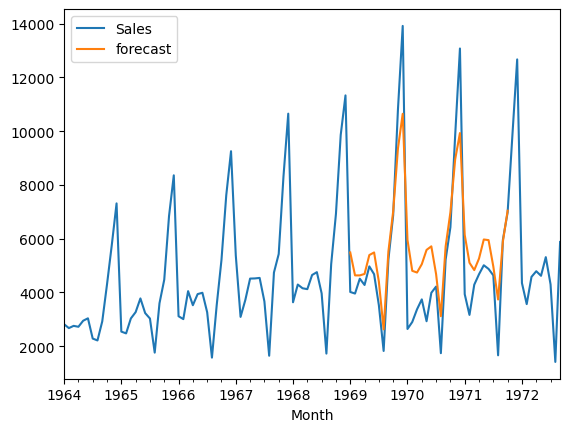

In [51]:
data[['Sales','forecast']].plot()

The prediction here if you look is completely wrong as we have tried to fit an arima model for the data that has seasonality

In [53]:
pip install --upgrade statsmodels

Defaulting to user installation because normal site-packages is not writeable
  Obtaining dependency information for statsmodels from https://files.pythonhosted.org/packages/d5/7e/61ec96b208af273126a211a9aa1c9dfefb216725192973fc52a858ac9219/statsmodels-0.14.2-cp311-cp311-win_amd64.whl.metadata
  Obtaining dependency information for patsy>=0.5.6 from https://files.pythonhosted.org/packages/43/f3/1d311a09c34f14f5973bb0bb0dc3a6e007e1eda90b5492d082689936ca51/patsy-0.5.6-py2.py3-none-any.whl.metadata
   ---------------------------------------- 0.0/9.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/9.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/9.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/9.9 MB 393.8 kB/s eta 0:00:25
   ---------------------------------------- 0.1/9.9 MB 1.0 MB/s eta 0:00:10
   - -------------------------------------- 0.3/9.9 MB 1.6 MB/s eta 0:00:06
   -- ------------------------------------- 0.5/9.9 MB 2.3 MB/

In [35]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [65]:
model=SARIMAX(data['Sales'],order=(11,1,1),seasonal_order=(11,1,12,12))
sarimax_model=model.fit()

C:\Users\chait\AppData\Roaming\Python\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\chait\AppData\Roaming\Python\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\chait\AppData\Roaming\Python\Python311\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
C:\Users\chait\AppData\Roaming\Python\Python311\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization faile

In [66]:
sarimax_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                                         SARIMAX Results                                                          
==================================================================================================================================
Dep. Variable:                                                                      Sales   No. Observations:                  105
Model:             SARIMAX(11, 1, 1)x(13, 1, [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12], 12)   Log Likelihood                -731.292
Date:                                                                    Tue, 11 Jun 2024   AIC                           1538.583
Time:                                                                            12:23:31   BIC                           1634.411
Sample:                                                                        01-01-1964   HQIC                          1577.260
                                                                             - 09-01-1972                                         
Covariance Type:                                                                      opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5401      1.377     -0.392      0.695      -3.239       2.159
ar.L2         -0.5939      0.830     -0.715      0.475      -2.221       1.034
ar.L3         -0.5558      1.048     -0.531      0.596      -2.609       1.497
ar.L4         -0.5931      0.870     -0.682      0.496      -2.299       1.113
ar.L5         -0.5462      0.987     -0.553      0.580      -2.481       1.389
ar.L6         -0.5266      0.877     -0.601      0.548      -2.245       1.192
ar.L7         -0.4632      0.991     -0.467      0.640      -2.406       1.479
ar.L8         -0.4777      0.912     -0.524      0.600      -2.265       1.309
ar.L9         -0.4142      0.982     -0.422      0.673      -2.338       1.510
ar.L10        -0.3794      0.852     -0.445      0.656      -2.050       1.291
ar.L11        -0.3608      0.864     -0.417      0.676      -2.055       1.333
ma.L1         -0.0465      1.333     -0.035      0.972      -2.659       2.566
ar.S.L12      -0.2766   1.59e+05  -1.74e-06      1.000   -3.12e+05    3.12e+05
ar.S.L24       0.0428   6.69e+04    6.4e-07      1.000   -1.31e+05    1.31e+05
ar.S.L36       0.1335   9.68e+04   1.38e-06      1.000    -1.9e+05     1.9e+05
ar.S.L48       0.2231   1.01e+05    2.2e-06      1.000   -1.99e+05    1.99e+05
ar.S.L60       0.1757   9.75e+04    1.8e-06      1.000   -1.91e+05    1.91e+05
ar.S.L72      -0.0384   7.53e+04   -5.1e-07      1.000   -1.48e+05    1.48e+05
ar.S.L84      -0.0519   7.49e+04  -6.93e-07      1.000   -1.47e+05    1.47e+05
ar.S.L96       0.1081    8.1e+04   1.33e-06      1.000   -1.59e+05    1.59e+05
ar.S.L108     -0.0547   4.55e+04   -1.2e-06      1.000   -8.92e+04    8.92e+04
ar.S.L120     -0.0149    4.7e+04  -3.17e-07      1.000   -9.21e+04    9.21e+04
ar.S.L132     -0.0467   4.48e+04  -1.04e-06      1.000   -8.79e+04    8.79e+04
ar.S.L144     -0.0654   5.25e+04  -1.25e-06      1.000   -1.03e+05    1.03e+05
ar.S.L156     -0.0095   5.41e+04  -1.75e-07      1.000   -1.06e+05    1.06e+05
ma.S.L12      -0.3502   1.58e+05  -2.21e-06      1.000    -3.1e+05     3.1e+05
ma.S.L24       0.0491   1.16e+05   4.21e-07      1.000   -2.28e+05    2.28e+05
ma.S.L36      -0.0472   1.38e+05  -3.43e-07      1.000    -2.7e+05     2.7e+05
ma.S.L48       0.0144   1.45e+05   9.95e-08      1.000   -2.85e+05    2.85e+05
ma.S.L60       0.1965   1.48e+05   1.33e-06      1.000    -2.9e+05     2.9e+05
ma.S.L72      -0.1090   1.08e+05  -1.01e-06      1.000   -2.12e+05    2.12e+05
ma.S.L84      -0.0588   8.13e+04  -7.24e-07      1.000   -1.59e+05    1.59e+05
ma.S.L96

In [67]:
data['forecast']=sarimax_model.predict(start=60,end=93,dynamic=True)

<Axes: xlabel='Month'>

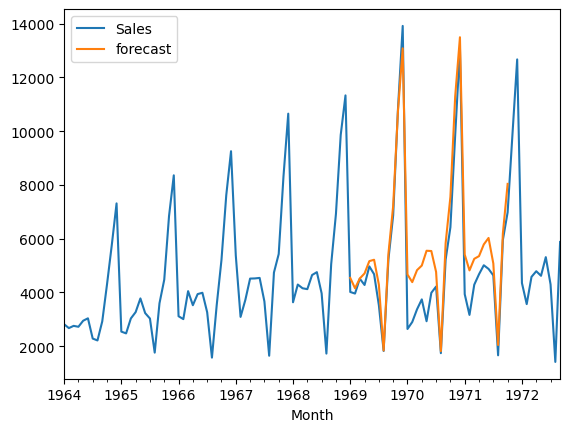

In [68]:
data[['Sales','forecast']].plot()

In [74]:
from pandas.tseries.offsets import DateOffset
future_dates=[data.index[-1]+DateOffset(months=x)for x in range(0,48)]


In [75]:
future_dataset_data=pd.DataFrame(index=future_dates[1:],columns=data.columns)

In [76]:
future_dataset_data.tail()

,Sales,Sales first difference,Seasonal first difference,forecast
1976-04-01,NaN,NaN,NaN,NaN
1976-05-01,NaN,NaN,NaN,NaN
1976-06-01,NaN,NaN,NaN,NaN
1976-07-01,NaN,NaN,NaN,NaN
1976-08-01,NaN,NaN,NaN,NaN


In [78]:
future_data=pd.concat([data,future_dataset_data])

<Axes: >

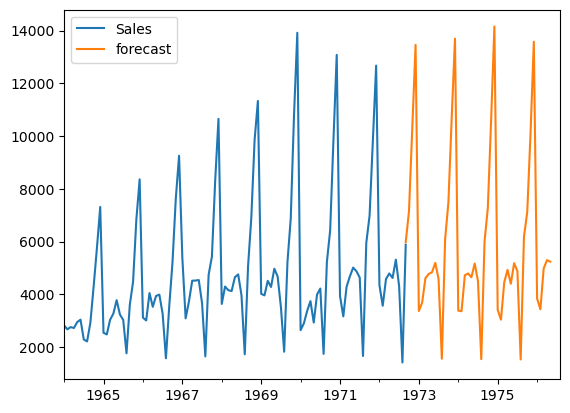

In [79]:
future_data['forecast']=sarimax_model.predict(start=104,end=148,dynamic=True)
future_data[['Sales','forecast']].plot()